<a href="https://colab.research.google.com/github/sohagswe1/210147_Decision_Tree/blob/main/210147_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/sohagswe1/210147_Decision_Tree/refs/heads/main/Breast_Cancer.csv"
df=pd.read_csv(url)
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## 1.Data Preprocessing


In [2]:
#Checking Missing Values
print("----Check Missing Values----")
print(df.isnull().sum())

#Describetion
print("----Description----")
print(df.describe().T)

#Information
print("----Information----")
print(df.info())

----Check Missing Values----
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64
----Description----
                         count       mean        std   min   25%   50%   75%  \
Age                     4024.0  53.972167   8.963134  30.0  47.0  54.0  61.0   
Tumor Size              4024.0  30.473658  21.119696   1.0  16.0  25.0  38.0   
Regional Node Examined  4024.0  14.357107   8.099675   1.0   9.0  14.0  19.0   
Reginol Node Positive   4024.0   4.158052   5.109331   1.0   1.0   2.0   5.0   
Survival Months         4024.0  71.297962  22.921430   1.0  56.0  73.0  90.0   

         

### 1.1: Check Unique value

In [3]:
#Unique values
print("----Unique Value----")
print(df.nunique())

----Unique Value----
Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64


In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df.drop_duplicates(inplace=True)

### 1.2: Outliers Detection and Removeing

In [6]:
data_numeric=df.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")
    if outlier>0:
        df=df.loc[(df[col]<=upper_bound) & (df[col]>=lower_bound)]

Total Outliers in Age are 0-0.0%
Total Outliers in Tumor Size are 222-5.52%
Total Outliers in Regional Node Examined are 72-1.79%
Total Outliers in Reginol Node Positive are 551-13.7%
Total Outliers in Survival Months are 37-0.92%


In [7]:
data_numeric=df.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")
    if outlier>0:
        df=df.loc[(df[col]<=upper_bound) & (df[col]>=lower_bound)]

Total Outliers in Age are 0-0.0%
Total Outliers in Tumor Size are 168-5.16%
Total Outliers in Regional Node Examined are 5-0.15%
Total Outliers in Reginol Node Positive are 160-4.91%
Total Outliers in Survival Months are 6-0.18%


###1.3: Distribution of Numeric Columns

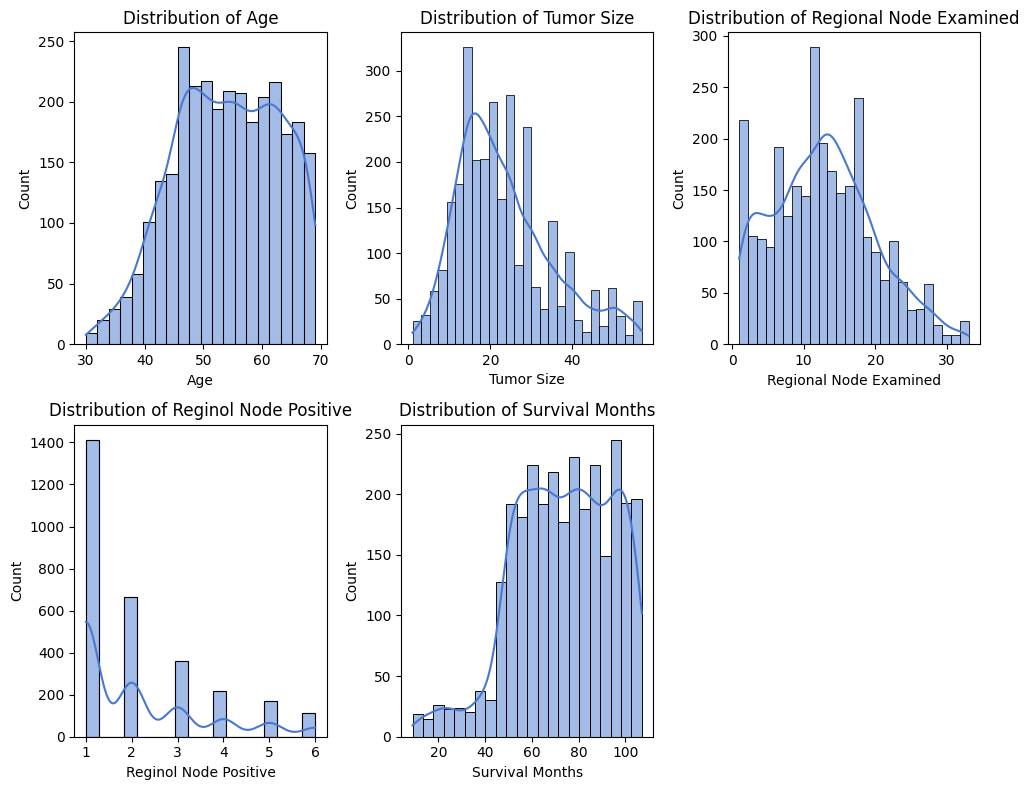

In [8]:
sns.set_palette("muted")#"deep" ,"muted" ,"pastel" ,"dark"
plt.figure(figsize=(10,8))
for i ,col in enumerate(data_numeric,1):
  plt.subplot(2,3,i)
  sns.histplot(df[col],kde=True)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

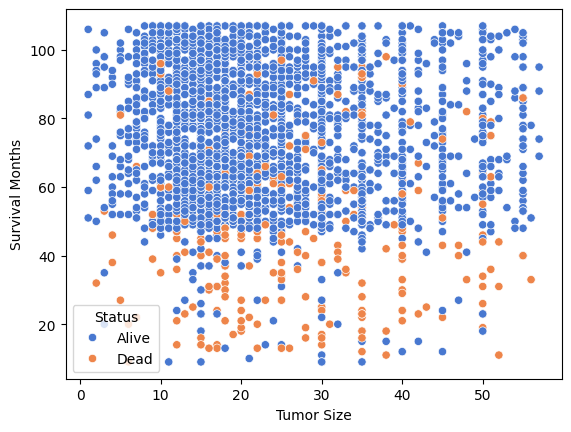

In [9]:
sns.scatterplot(data=df,x="Tumor Size",y="Survival Months",hue="Status")
plt.show()


### 1.4: Label Encoding of Binary Categorical values

In [10]:
ob=df.select_dtypes(include="object")
la=LabelEncoder()
for i in range(0,ob.shape[1]):
    ob.iloc[:,i]=la.fit_transform(ob.iloc[:,i])
ob=ob.astype(int)
ob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2933 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Race                 2933 non-null   int64
 1   Marital Status       2933 non-null   int64
 2   T Stage              2933 non-null   int64
 3   N Stage              2933 non-null   int64
 4   6th Stage            2933 non-null   int64
 5   differentiate        2933 non-null   int64
 6   Grade                2933 non-null   int64
 7   A Stage              2933 non-null   int64
 8   Estrogen Status      2933 non-null   int64
 9   Progesterone Status  2933 non-null   int64
 10  Status               2933 non-null   int64
dtypes: int64(11)
memory usage: 275.0 KB


### 1.5: Combine numerical and categorical columns

In [11]:
not_ob=df.select_dtypes(exclude='object')
prep_dataset=pd.concat([not_ob,ob],axis=1)
prep_dataset.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,68,4,24,1,60,2,1,0,0,0,1,3,1,1,1,0
1,50,35,14,5,62,2,1,1,1,2,0,2,1,1,1,0
3,58,18,2,1,84,2,1,0,0,0,1,3,1,1,1,0
4,47,41,3,1,50,2,1,1,0,1,1,3,1,1,1,0
5,51,20,18,2,89,2,3,0,0,0,0,2,1,1,1,0


###1.6: Feature Scaling

In [12]:
Scalar=StandardScaler()
prep_dataset.iloc[:,:-1]=Scalar.fit_transform(prep_dataset.iloc[:,:-1])
prep_dataset

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,1.569110,-1.669923,1.575827,-0.784771,-0.646676,0.394241,-0.347859,-0.929532,-0.430844,-0.960445,0.277939,1.438554,0.076354,0.244151,0.425155,0
1,-0.447826,0.987219,0.162142,2.034254,-0.551143,0.394241,-0.347859,0.714809,2.142811,1.509512,-0.666668,-0.143478,0.076354,0.244151,0.425155,0
3,0.448590,-0.469923,-1.534280,-0.784771,0.499713,0.394241,-0.347859,-0.929532,-0.430844,-0.960445,0.277939,1.438554,0.076354,0.244151,0.425155,0
4,-0.783982,1.501504,-1.392911,-0.784771,-1.124337,0.394241,-0.347859,0.714809,-0.430844,0.274533,0.277939,1.438554,0.076354,0.244151,0.425155,0
5,-0.335774,-0.298495,0.727616,-0.080015,0.738544,0.394241,1.557408,-0.929532,-0.430844,-0.960445,-0.666668,-0.143478,0.076354,0.244151,0.425155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,1.120902,-1.155637,-0.261963,-0.784771,-0.169014,0.394241,-0.347859,-0.929532,-0.430844,-0.960445,-0.666668,-0.143478,0.076354,0.244151,0.425155,0
4019,0.896798,-1.241351,-1.675648,-0.784771,-1.172104,-1.392944,-0.347859,-0.929532,-0.430844,-0.960445,-0.666668,-0.143478,0.076354,0.244151,0.425155,0
4021,1.569110,-0.127066,-0.261963,0.624741,-0.216780,0.394241,-0.347859,0.714809,-0.430844,0.274533,-0.666668,-0.143478,0.076354,0.244151,-2.352083,0
4022,0.448590,1.758647,-0.261963,-0.784771,-0.073481,-3.180128,-1.300492,0.714809,-0.430844,0.274533,-0.666668,-0.143478,0.076354,0.244151,0.425155,0


#2.Train test split into the dataset

In [13]:
X=prep_dataset.drop("Status",axis=1)
y=prep_dataset["Status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# 3.Applying the Model

In [14]:
# ======================================================
# Decision Tree Assignment: CART (Gini) vs ID3 (Entropy)
# ======================================================

# CART model (Gini)
cart = DecisionTreeClassifier(criterion="gini", random_state=42)

cart_params = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10]
}

cart_grid = GridSearchCV(
    estimator=cart,
    param_grid=cart_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

cart_grid.fit(X_train, y_train)

cart_best = cart_grid.best_estimator_

print("Best CART parameters:", cart_grid.best_params_)


# ID3 (Entropy)
# ID3 model (Entropy)
id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)

id3_params = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10]
}

id3_grid = GridSearchCV(
    estimator=id3,
    param_grid=id3_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

id3_grid.fit(X_train, y_train)

id3_best = id3_grid.best_estimator_

print("Best ID3 parameters:", id3_grid.best_params_)



Best CART parameters: {'max_depth': 4, 'min_samples_split': 10}
Best ID3 parameters: {'max_depth': 3, 'min_samples_split': 2}


### 3.1: Predictions of two models

In [15]:
cart_pred = cart_best.predict(X_test)
id3_pred = id3_best.predict(X_test)

cart_prob = cart_best.predict_proba(X_test)[:, 1]
id3_prob = id3_best.predict_proba(X_test)[:, 1]

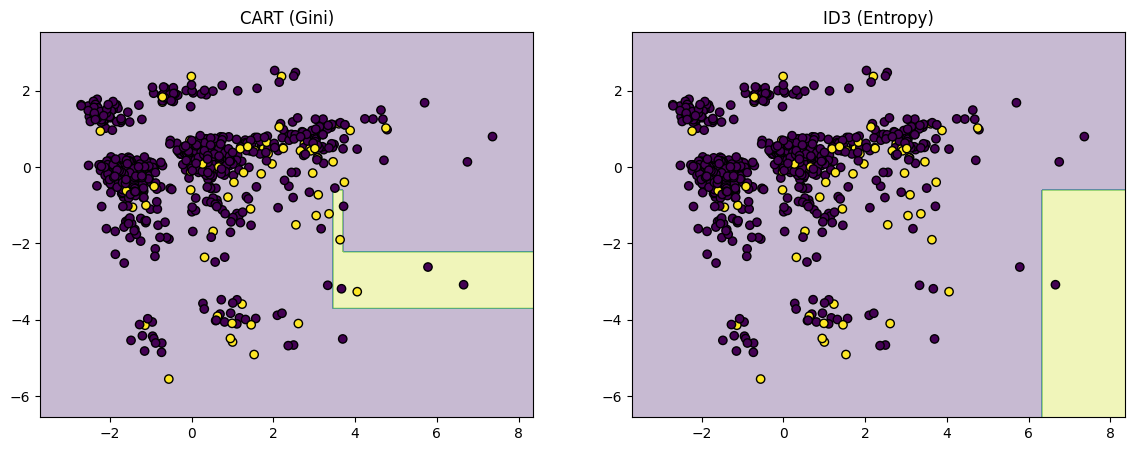

In [16]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# PCA directly on X (NO preprocessor, NO pipeline)
# ======================================================

# Convert X to NumPy (important if X is a DataFrame)
X_array = X.values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# ======================================================
# Recreate CART and ID3 using best hyperparameters
# ======================================================

cart_vis = DecisionTreeClassifier(
    criterion="gini",
    max_depth=cart_best.max_depth,
    min_samples_split=cart_best.min_samples_split,
    random_state=42
)

id3_vis = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=id3_best.max_depth,
    min_samples_split=id3_best.min_samples_split,
    random_state=42
)

cart_vis.fit(X_train_pca, y_train_pca)
id3_vis.fit(X_train_pca, y_train_pca)

# ======================================================
# Decision Boundary Function
# ======================================================

def plot_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    ax.set_title(title)

# ======================================================
# 2×1 Decision Boundary Plot (CART vs ID3)
# ======================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_boundary(cart_vis, X_test_pca, y_test_pca, axes[0], "CART (Gini)")
plot_boundary(id3_vis, X_test_pca, y_test_pca, axes[1], "ID3 (Entropy)")

plt.show()


# 4.Models Evaluation

### 4.1: Confusion Matrix (2×1)

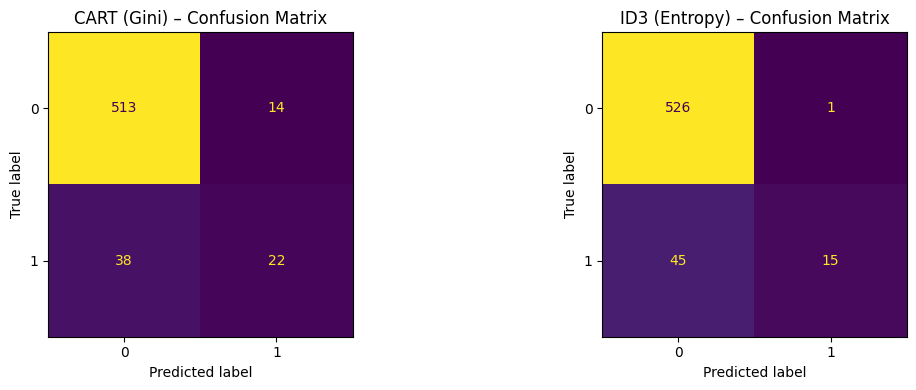

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# CART Confusion Matrix
cm_cart = confusion_matrix(y_test, cart_pred)
ConfusionMatrixDisplay(cm_cart).plot(ax=axes[0], colorbar=False)
axes[0].set_title("CART (Gini) – Confusion Matrix")

# ID3 Confusion Matrix
cm_id3 = confusion_matrix(y_test, id3_pred)
ConfusionMatrixDisplay(cm_id3).plot(ax=axes[1], colorbar=False)
axes[1].set_title("ID3 (Entropy) – Confusion Matrix")

plt.tight_layout()
plt.show()


### 4.2: ROC Curve (2×1)

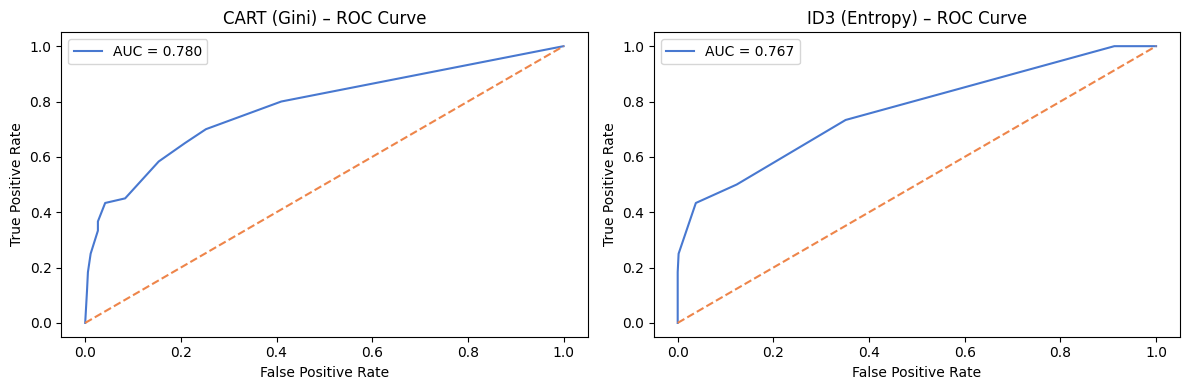

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# CART ROC
fpr_cart, tpr_cart, _ = roc_curve(y_test, cart_prob)
axes[0].plot(fpr_cart, tpr_cart, label=f"AUC = {roc_auc_score(y_test, cart_prob):.3f}")
axes[0].plot([0, 1], [0, 1], "--")
axes[0].set_title("CART (Gini) – ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# ID3 ROC
fpr_id3, tpr_id3, _ = roc_curve(y_test, id3_prob)
axes[1].plot(fpr_id3, tpr_id3, label=f"AUC = {roc_auc_score(y_test, id3_prob):.3f}")
axes[1].plot([0, 1], [0, 1], "--")
axes[1].set_title("ID3 (Entropy) – ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()


### 4.3: Evaluation Metrics (Combined Bar Chart)

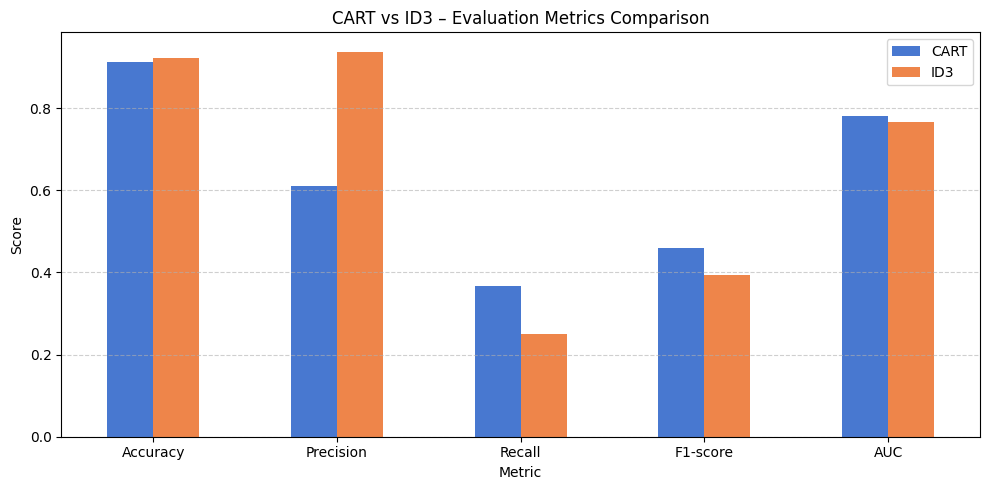

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "CART": [
        accuracy_score(y_test, cart_pred),
        precision_score(y_test, cart_pred),
        recall_score(y_test, cart_pred),
        f1_score(y_test, cart_pred),
        roc_auc_score(y_test, cart_prob)
    ],
    "ID3": [
        accuracy_score(y_test, id3_pred),
        precision_score(y_test, id3_pred),
        recall_score(y_test, id3_pred),
        f1_score(y_test, id3_pred),
        roc_auc_score(y_test, id3_prob)
    ]
})

metrics_df.set_index("Metric").plot(
    kind="bar",
    figsize=(10, 5)
)

plt.title("CART vs ID3 – Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### 4.4.1: Decision Tree Structure (Single Image)

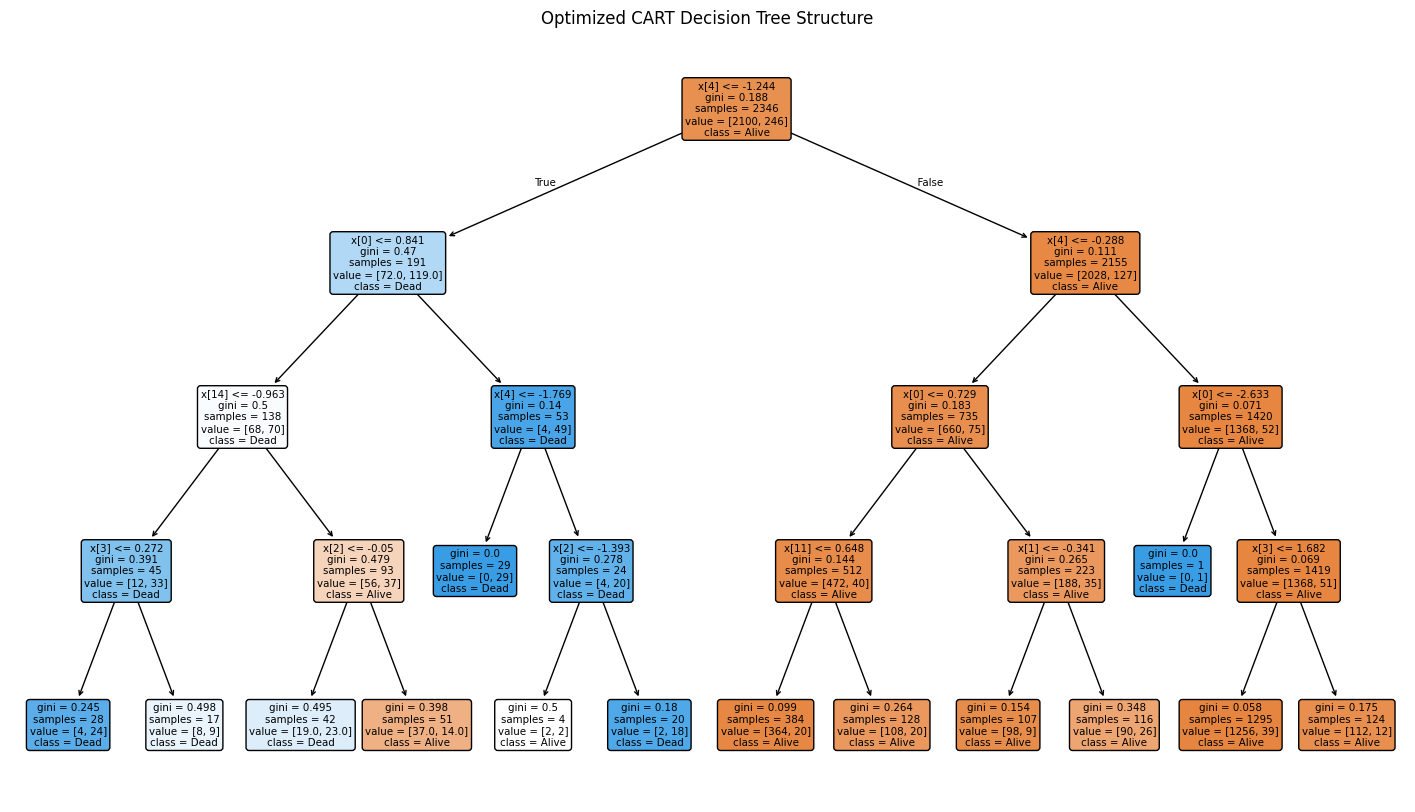

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))

plot_tree(
    cart_best,
    filled=True,
    class_names=["Alive", "Dead"],
    rounded=True
)

plt.title("Optimized CART Decision Tree Structure")
plt.show()


### 4.4.2: ID3 Decision Tree Structure (Single Image)

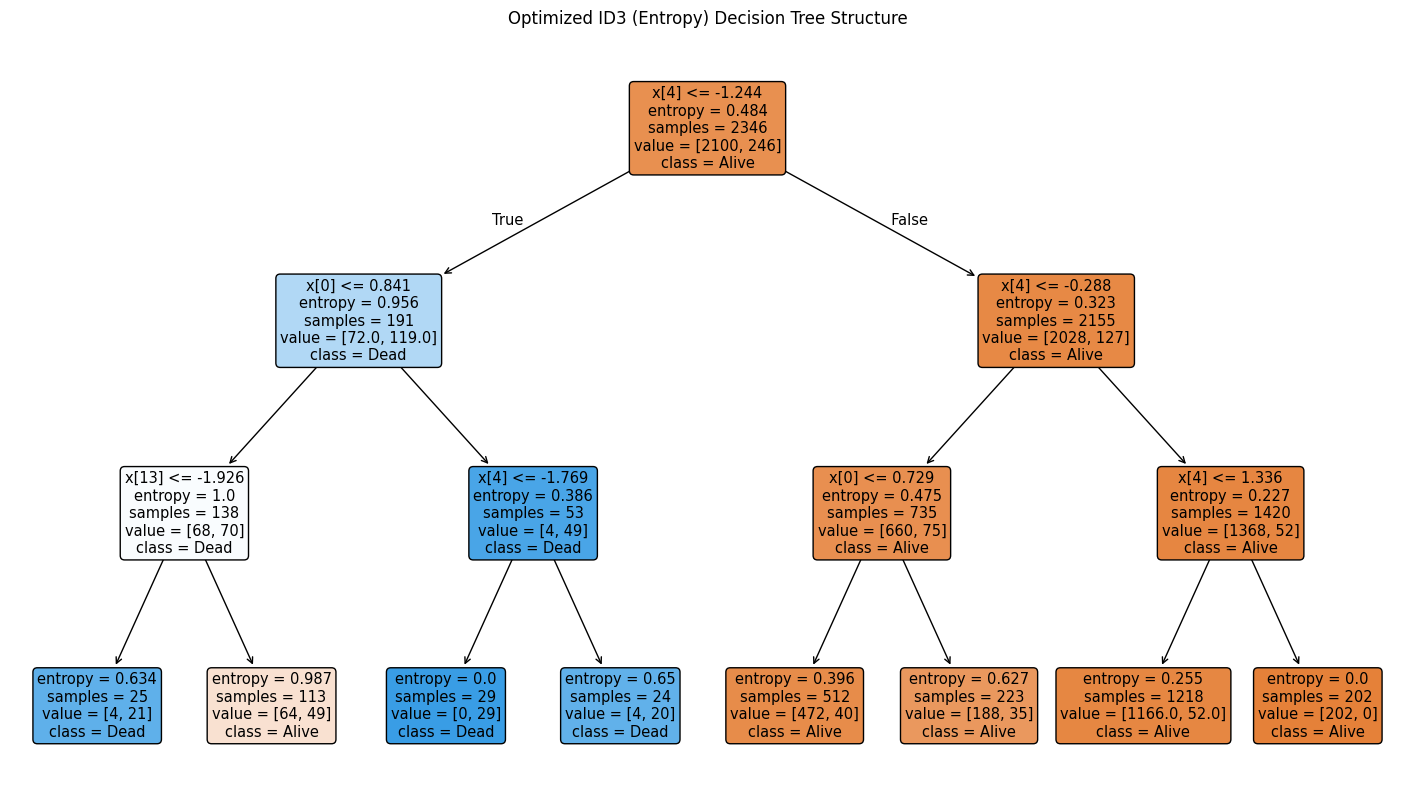

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

plot_tree(
    id3_best,
    filled=True,
    rounded=True,
    class_names=["Alive", "Dead"]
)

plt.title("Optimized ID3 (Entropy) Decision Tree Structure")
plt.show()
